In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
from scipy import ndimage

## Чтение файла и преобразование его в numpy матрице

In [2]:
def exel_to_array(filename):
    '''Read exel file and extract data to numpy array'''
    points = list(range(1,15))
    names = list(map(lambda x: 'point_{}'.format(x), points))
    data = pd.read_excel(filename, header=None, names = names)
    return data.to_numpy()

In [3]:
a = exel_to_array('Mn_sw-15_ampl-210.xlsx')

## Обработка матрицы синусом, возвращает матрицу

In [4]:
def sinus_proc(matrix, phase):
    '''proccesing  matrix with sinus'''
    full = list()
    rad = phase/360
    
    for i in range(matrix.shape[0]):
        str_sin = 0
        for j in range(matrix.shape[1]):
            str_sin += matrix[i][j] * (np.sin((2* np.pi) * ((j / matrix.shape[1]) + rad)))
        full.append(str_sin)   
    return full

## Добавление виртуальных точек между строками, возвращает матрицу

In [54]:
def add_virtual_points(matrix):
    '''Add virtual points between rows
        1000x14 --> 2000x14'''
    data_sub = np.empty((matrix.shape[0],matrix.shape[1]))
    for i in range(matrix.shape[0] - 1):
        data_sub[i] = (matrix[i+1] + matrix[i]) / 2 
    
    full_data = np.empty((matrix.shape[0] * 2,14))
    
    full_data = []
    for i in range(matrix.shape[0] - 1):
        full_data.append(matrix[i])
        full_data.append(data_sub[i])
    #full_arr = np.array(full_data)
    return np.array(full_data)
    

## Использование функция свертки

In [214]:
k = np.array([[0,0,0,0,0,1,1,1,0,0,0,0,0,0],
              [0,0,0,0,0,1,-1,1,0,0,0,0,0,0],])
mode = ['reflect', 'constant', 'nearest', 'mirror', 'wrap']


def convolution(matrix, kernel, mode='constant', cval=0.0):
    '''proccesing matrix with kernel'''
    res = ndimage.convolve(matrix, kernel, mode=mode, cval=cval)
    return res

conv = convolution(a, k,'constant' , 0.0);
#res = ndimage.convolve(b1, k, mode='constant', cval=1.0)

In [316]:
def convolution_2(matrix, a=0, b=7):
    '''
    proccesing matrix with kernel
    a - start point, 
    b - kernel size
    '''
    dots = []
    dots_first = []
    dots_last = []
    for i in range(matrix.shape[0]):   
        kernel = matrix[i:b+i,a-1:(a-1)+b]
        b_f = np.asarray(kernel)
        b_f = np.fliplr(b_f)
        dots.append((np.trace(b_f)) / b)
    return np.array(dots)
    
conv_2 = convolution_2(a,1,7);


## Добавление виртуальных точек между каждым элементом, возвращает матрицу

In [171]:
def add_virtual_points_width_2(matrix):
    '''Add virtual points between columns 
        1000x14 --> 1000x28'''
    matrix_to_add = np.empty((matrix.shape[0],matrix.shape[1]))
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if j < 13:
                matrix_to_add[i][j] = (matrix[i][j] + matrix[i][j+1]) / 2
            else: 
                matrix_to_add[i][j] = (matrix[i][13] + matrix[i][0]) / 2
    
    #matrix_to_add = [(matrix[0][i-1] + matrix[0][i]) / 2 for i in range(1,len(matrix[0]))]
    full_data=[]
    for j in range(matrix.shape[0]):
        for i in range(0,matrix_to_add.shape[1]):
            full_data.append(matrix[j][i])
            full_data.append(matrix_to_add[j][i])
    full_data = np.asarray(full_data)
    full_data = full_data.reshape(matrix.shape[0],matrix.shape[1]*2)
    return full_data

# Декопозиция спектра до исходного размера

In [190]:
def decomposition_height(matrix, height=1000, width=14):
    '''assembly of the expanded spectrum to height in the original
       2000x14 --> 1000x14'''
    data_sub = np.empty((matrix.shape[0]-1,matrix.shape[1]))
    #data_sub = np.empty((height, width))
    for i in range(0,matrix.shape[0] - 1,2):
        data_sub[i] = (matrix[i+1] + matrix[i]) / 2
    
    
    full_data = []
    for i in range(0, matrix.shape[0], 2):
        full_data.append(data_sub[i])
    return np.array(full_data)
    

In [218]:
def decomposition_width(matrix, height=1000, width=14):
    '''assembly of the expanded spectrum to width in the original
       1000x28 --> 1000x14'''
    matrix_to_add = np.empty((matrix.shape[0],matrix.shape[1]))
    for i in range(matrix.shape[0]):
        for j in range(0,matrix.shape[1],2):
            if j < 27:
                matrix_to_add[i][j] = (matrix[i][j] + matrix[i][j+1]) / 2
            else: 
                matrix_to_add[i][j] = (matrix[i][13] + matrix[i][0]) / 2
    
    #matrix_to_add = [(matrix[0][i-1] + matrix[0][i]) / 2 for i in range(1,len(matrix[0]))]
    full_data=[]
    for j in range(matrix.shape[0]):
        for i in range(0,matrix_to_add.shape[1],2):
            full_data.append(matrix_to_add[j][i])
    full_data = np.asarray(full_data)
    full_data = full_data.reshape(matrix.shape[0],14)
    return full_data

In [305]:
a = exel_to_array('Mn_sw-15_ampl-210.xlsx')

In [318]:
type(a)

numpy.ndarray

In [306]:
b = add_virtual_points(a)

In [307]:
b2 = add_virtual_points_width_2(b)

In [308]:
b2.shape

(1996, 28)

In [319]:
b3 = convolution(b2, k,'constant' , 1.0)


TypeError: 'numpy.ndarray' object is not callable

In [323]:
b8 = convolution_2(b2, 14, 7)
b8.shape

(1996,)

In [310]:
b3.shape

(1996, 28)

In [325]:
b4 = decomposition_height(b3)
b4.shape

(998, 28)

In [326]:
b5 = decomposition_width(b4)
b5.shape


(998, 14)

In [313]:
b6 = sinus_proc(b5, 0)
b_orig = sinus_proc(a,0)


Text(0.5, 1.0, 'Original')

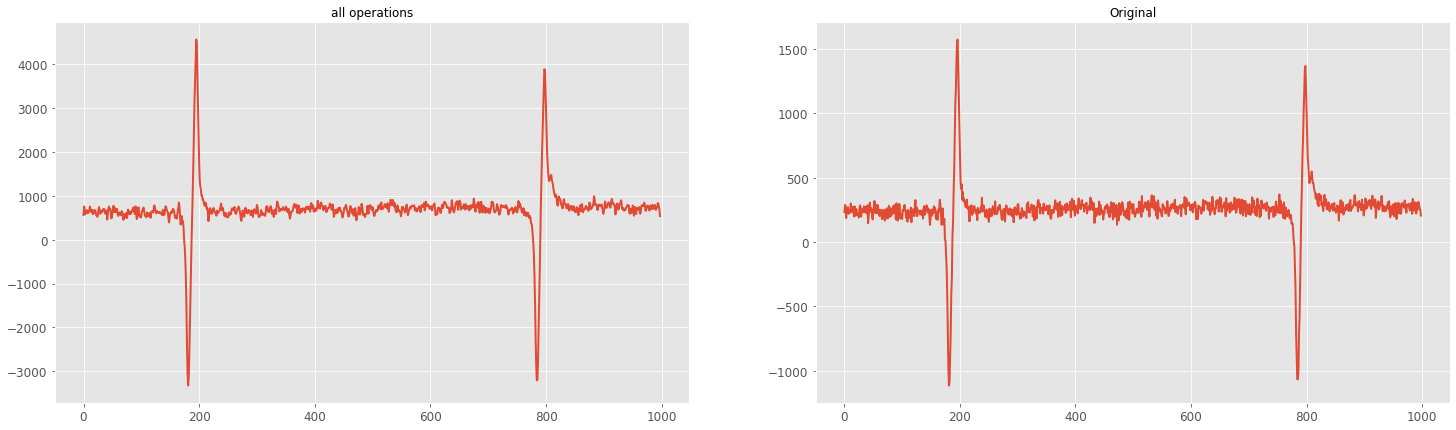

In [314]:
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
plt.plot(range(len(b6)), b6)
plt.title('all operations')
plt.subplot(1,2,2)
plt.plot(range(len(b_orig)), b_orig)
plt.title('Original')

In [304]:
identity = np.array([[0,0,0],
              [0,1,0],
              [0,0,0]
              ])

sharpen =  np.array([
              [0,-1,0],
              [-1,5,-1],
              [0,-1,0]
              ])

mean_blur = np.array([
              [1/9,1/9,1/9],
              [1/9,1/9,1/9],
              [1/9,1/9,1/9]
              ])

laplacian =  np.array([
              [0,1,0],
              [1,-4,1],
              [0,1,0]
              ])

gaussian_blur =  np.array([
              [1/16,2/16,1/16],
              [2/16,4/16,2/16],
              [1/16,2/16,1/16]
              ])
sobel = np.array([
              [-1,2,-1],
              [0,0,0],
              [1,2,1]
              ])

k =  np.array([
              [0,1,0],
              [0,1,0],
              [0,1,0]
              ])

# Identity

Text(0.5, 1.0, 'Original')

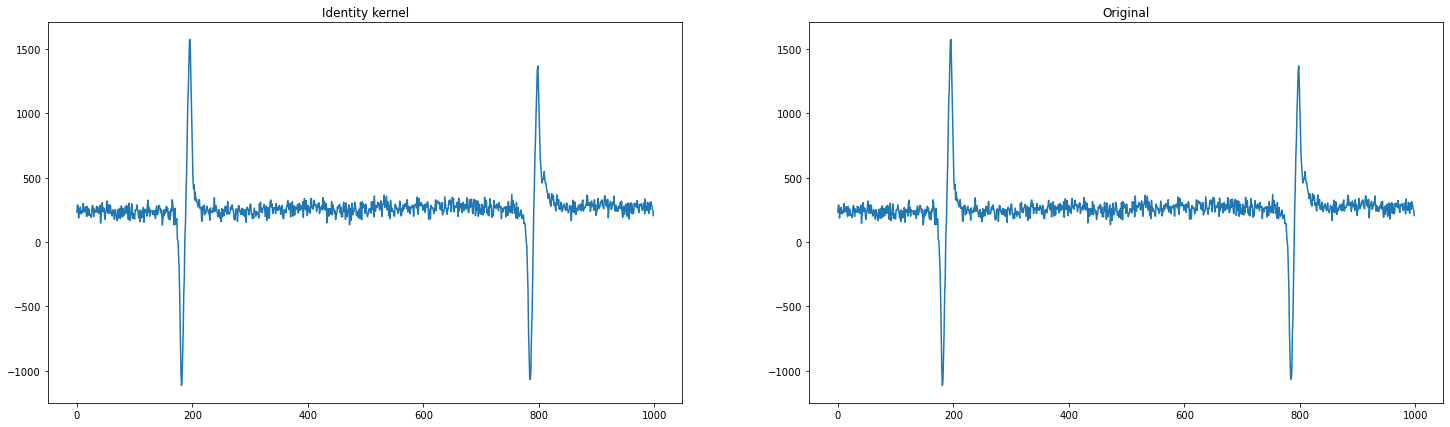

In [23]:
res = ndimage.convolve(a, identity, mode='constant', cval=1.0)
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
plt.plot(range(res.shape[0]), sinus_proc(res, 0))
plt.title('Identity kernel')
plt.subplot(1,2,2)
plt.plot(range(res.shape[0]), sinus_proc(a, 0))
plt.title('Original')

# Sharpen

Text(0.5, 1.0, 'Original')

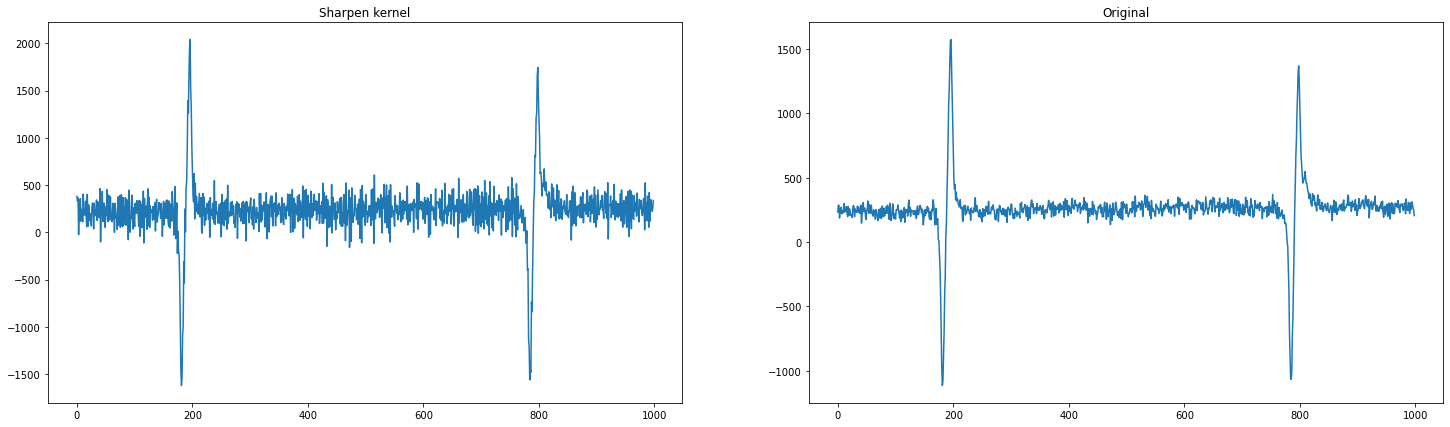

In [21]:
res = ndimage.convolve(a, sharpen, mode='constant', cval=1.0)
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
plt.plot(range(res.shape[0]), sinus_proc(res, 0))
plt.title('Sharpen kernel')
plt.subplot(1,2,2)
plt.plot(range(res.shape[0]), sinus_proc(a, 0))
plt.title('Original')

# Mean_blur

Text(0.5, 1.0, 'Original')

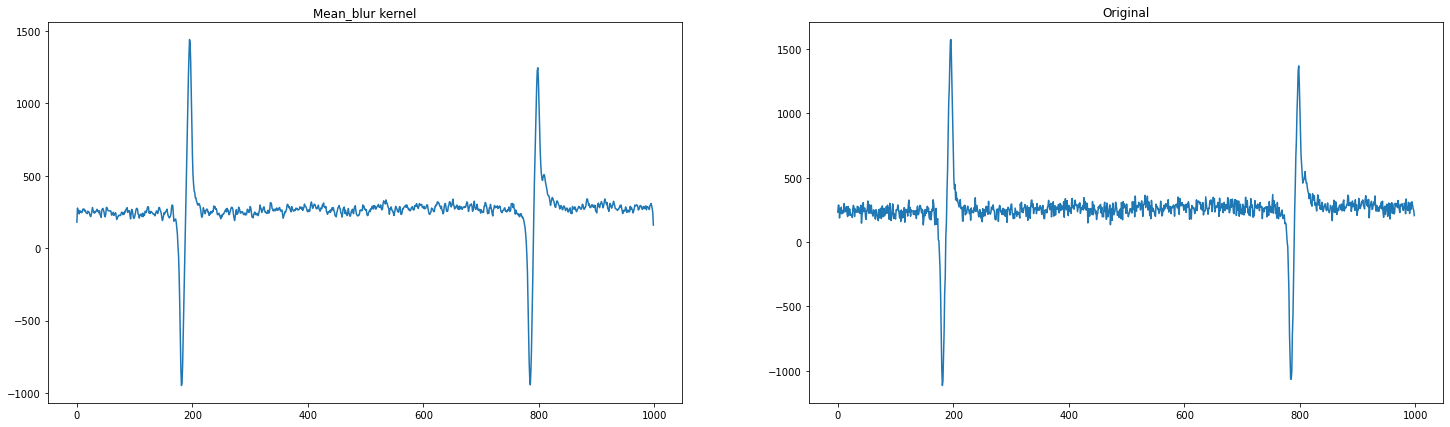

In [26]:
res = ndimage.convolve(a, mean_blur, mode='constant', cval=1.0)
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
plt.plot(range(res.shape[0]), sinus_proc(res, 0))
plt.title('Mean_blur kernel')
plt.subplot(1,2,2)
plt.plot(range(res.shape[0]), sinus_proc(a, 0))
plt.title('Original')

# Laplacian

Text(0.5, 1.0, 'Original')

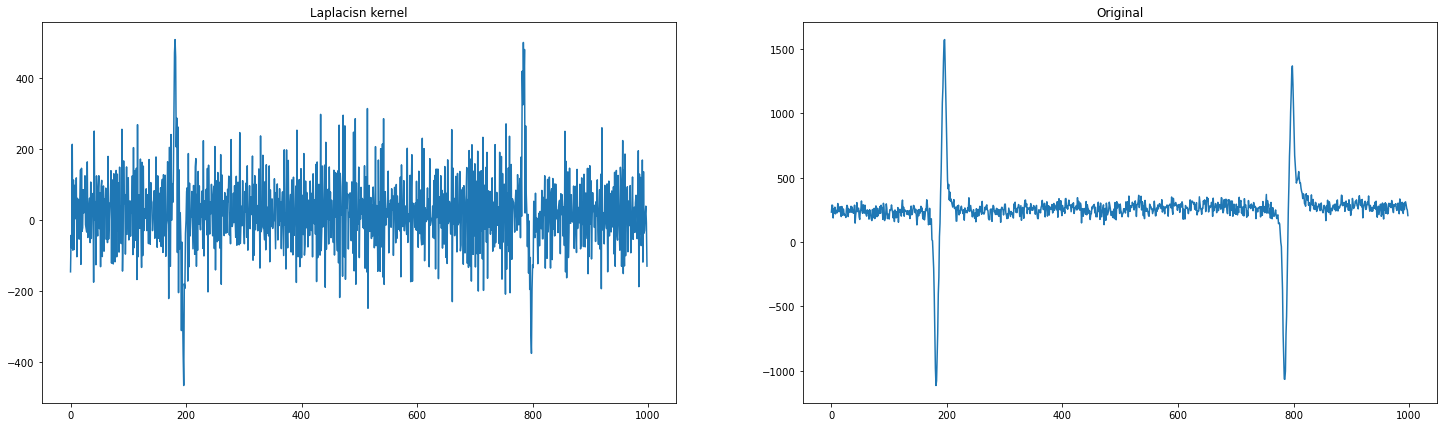

In [28]:
res = ndimage.convolve(a, laplacian, mode='constant', cval=1.0)
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
plt.plot(range(res.shape[0]), sinus_proc(res, 0))
plt.title('Laplacisn kernel')
plt.subplot(1,2,2)
plt.plot(range(res.shape[0]), sinus_proc(a, 0))
plt.title('Original')

# Gaussian Blur

Text(0.5, 1.0, 'Original')

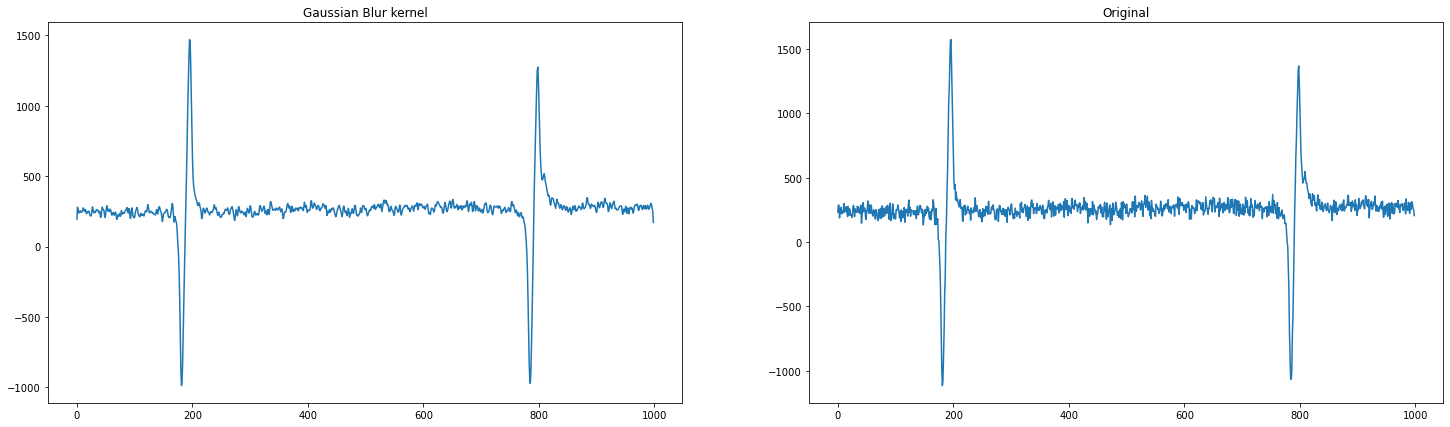

In [30]:
res = ndimage.convolve(a, gaussian_blur, mode='constant', cval=1.0)
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
plt.plot(range(res.shape[0]), sinus_proc(res, 0))
plt.title('Gaussian Blur kernel')
plt.subplot(1,2,2)
plt.plot(range(res.shape[0]), sinus_proc(a, 0))
plt.title('Original')

# Sobel Filters

Text(0.5, 1.0, 'Original')

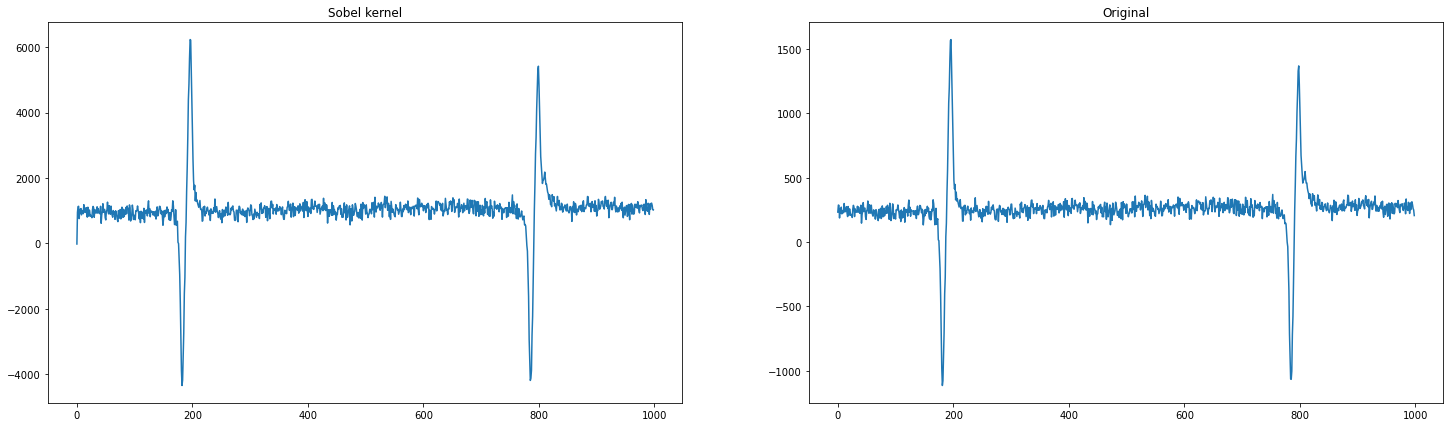

In [32]:
res = ndimage.convolve(a, sobel, mode='constant', cval=1.0)
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
plt.plot(range(res.shape[0]), sinus_proc(res, 0))
plt.title('Sobel kernel')
plt.subplot(1,2,2)
plt.plot(range(res.shape[0]), sinus_proc(a, 0))
plt.title('Original')

In [34]:
from statsmodels.nonparametric.smoothers_lowess import lowess

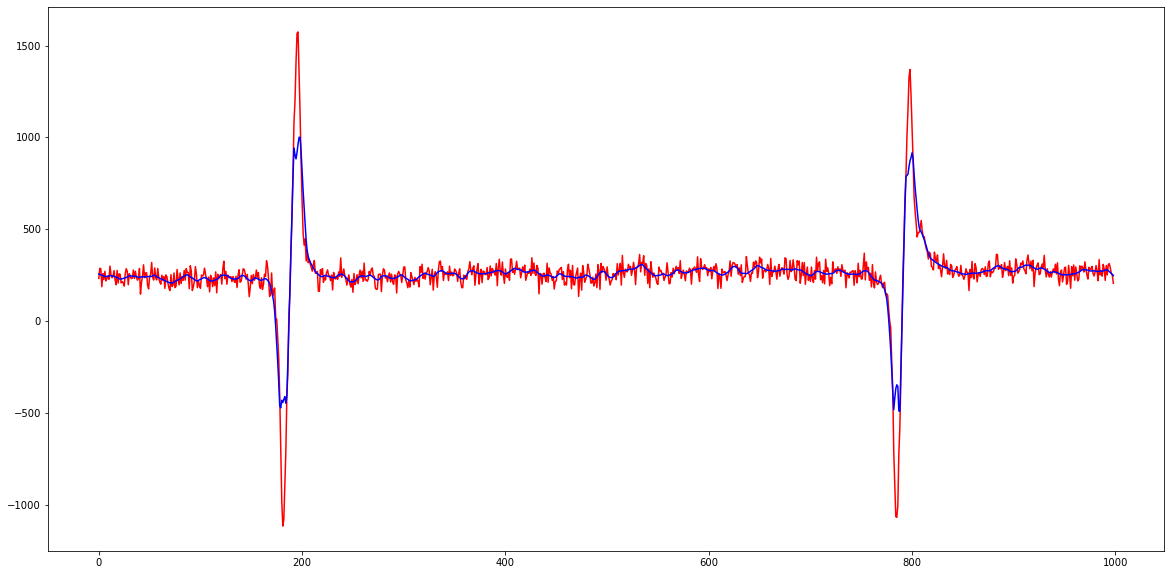

In [60]:
filtered = lowess(sinus_proc(a, 0 ), range(0,999), is_sorted=True, frac=0.015, it=1, delta=0.1)

plt.figure(figsize=(20,10))
plt.plot(range(0,999), sinus_proc(a, 0 ), 'r')
plt.plot(filtered[:,0], filtered[:,1], 'b')

In [47]:
len(sinus_proc(a, 0 ))

999

In [61]:
from scipy import signal

In [ ]:
signal.fftconvolve(in1, in2, mode='full', axes=None)

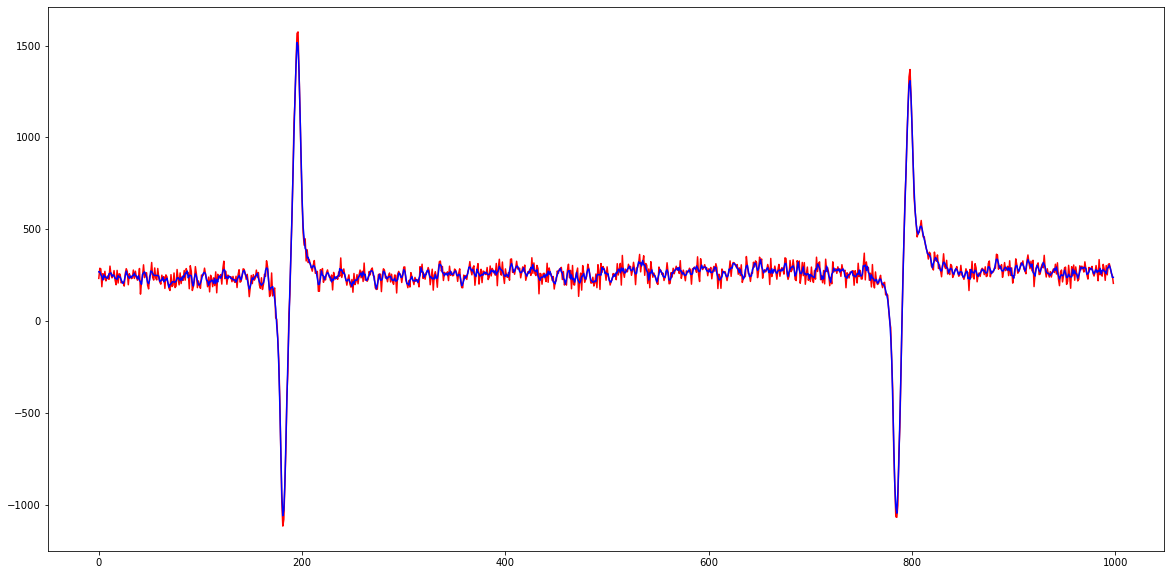

In [97]:
m = scipy.signal.savgol_filter(sinus_proc(a, 0), window_length=3, polyorder=0, deriv=0, delta=1.0, axis=- 1, mode='interp', cval=1.0)

filtered = lowess(sinus_proc(a, 0 ), range(0,999), is_sorted=True, frac=0.015, it=1, delta=0.1)

plt.figure(figsize=(20,10))
plt.plot(range(0,999), sinus_proc(a, 0 ), 'r')
plt.plot(range(0,999),m, 'b')

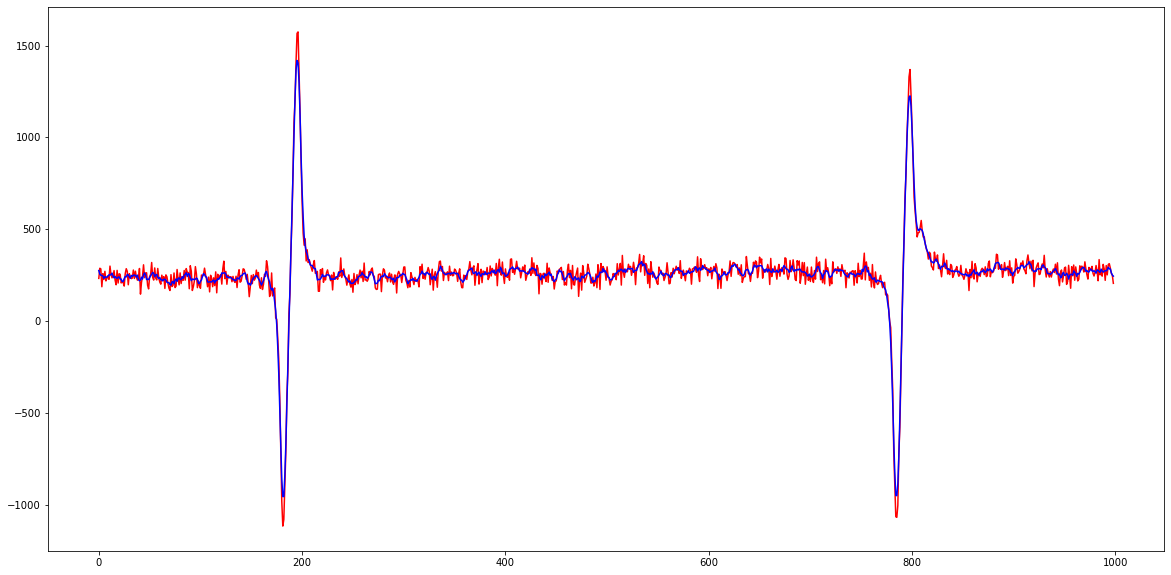

In [93]:
m = scipy.signal.savgol_filter(sinus_proc(a, 0), window_length=5, polyorder=0, deriv=0, delta=1.0, axis=- 1, mode='mirror', cval=1.0)

filtered = lowess(sinus_proc(a, 0 ), range(0,999), is_sorted=True, frac=0.015, it=1, delta=0.1)

plt.figure(figsize=(20,10))
plt.plot(range(0,999), sinus_proc(a, 0 ), 'r')
plt.plot(range(0,999),m, 'b')

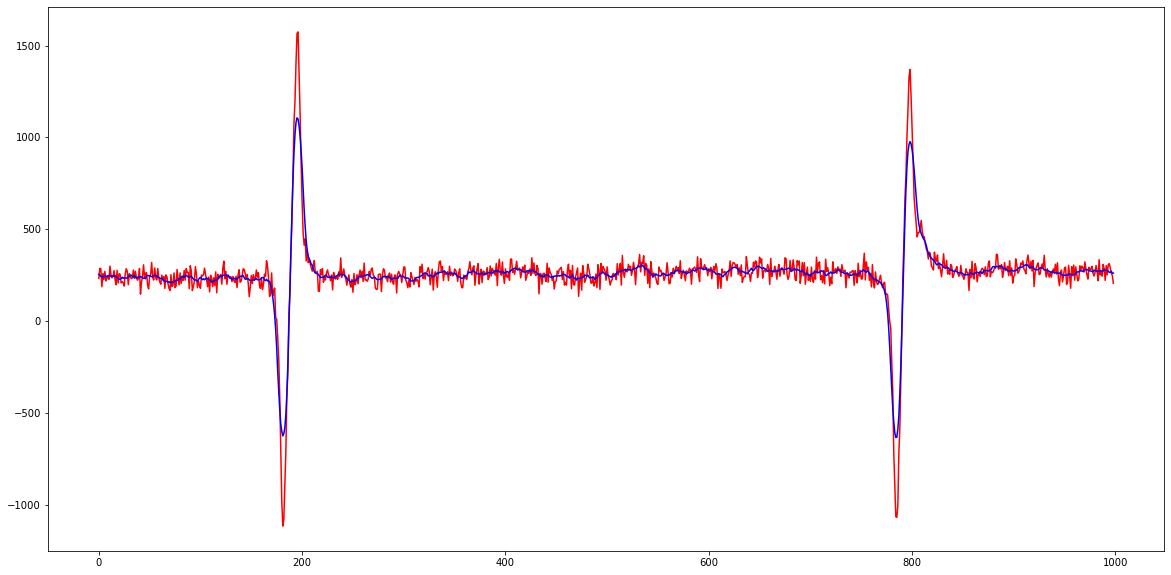

In [115]:

m = scipy.signal.savgol_filter(sinus_proc(a, 0), window_length=11, polyorder=0, deriv=0, delta=1.0, axis=- 1, mode='wrap', cval=1.0)

filtered = lowess(sinus_proc(a, 0 ), range(0,999), is_sorted=True, frac=0.015, it=1, delta=0.1)

plt.figure(figsize=(20,10))
plt.plot(range(0,999), sinus_proc(a, 0 ), 'r')
plt.plot(range(0,999),m, 'b')

In [217]:
from scipy import signal
from numpy.random import default_rng
rng = default_rng()
npoints = 999
noise = rng.standard_normal(npoints)
x = 3 + 2*np.linspace(0, 1, npoints) + noise
(signal.detrend(sinus_proc(a,0)) - noise).max()

1330.601924563138

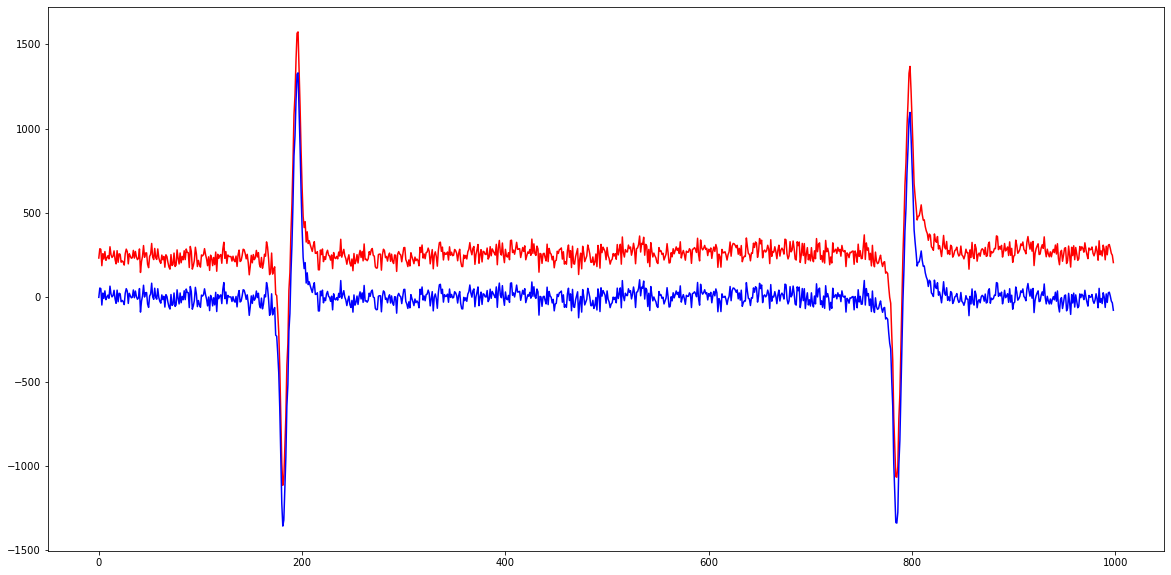

In [170]:
npoints = 999
noise = rng.standard_normal(npoints)
r = signal.detrend(sinus_proc(a,0))

plt.figure(figsize=(20,10))
plt.plot(range(0,999), sinus_proc(a, 0 ), 'r')
plt.plot(range(0,999),r, 'b')

In [151]:
len(r)

999

In [282]:
def signaltonoise(a, axis, ddof):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis = axis, ddof = ddof)
    return np.where(sd == 0, 0, m / sd)
  
print ("\nsignaltonoise ratio for arr1 : ", 
       signaltonoise(a, axis = 0, ddof = 0))


signaltonoise ratio for arr1 :  [ 8.29644509 11.56180205  8.32080962  6.86573714  5.70459715  5.34089885
  4.65292943  4.81292575  6.52136606  4.07750075  4.34809116  4.96340701
  4.00833282  5.47595582]


In [220]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import pywt
#from scipy import signal
from scipy.optimize import curve_fit

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import scipy 
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

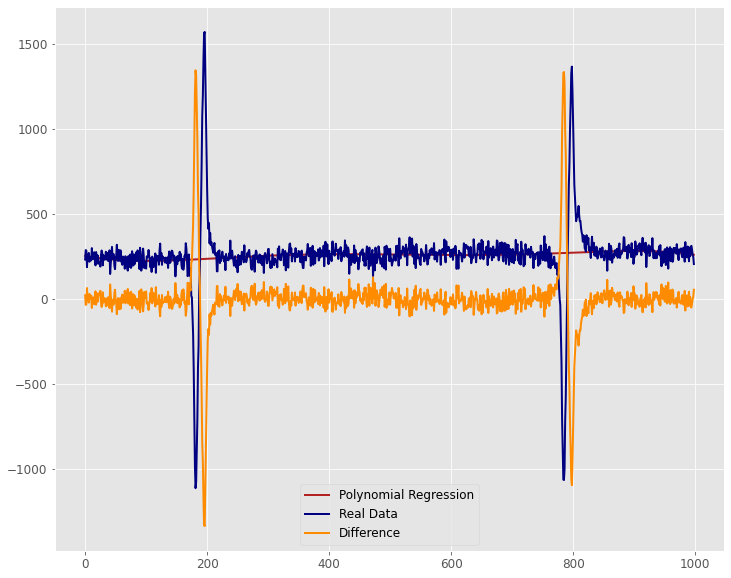

In [280]:
y = sinus_proc(a, 0)
X = np.arange(0,999).reshape(-1,1)
pf = PolynomialFeatures(5)
X = pf.fit_transform(X)
# y = 1 * x_0 + 2 * x_1 + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)

plt.plot(reg.predict(X),label='Polynomial Regression',color='firebrick')
plt.plot(range(0,999), y,label='Real Data',color='navy')
plt.plot(reg.predict(X)-y,label='Difference',color='darkorange')
plt.legend()


Text(0, 0.5, 'Fourier Amplitude')

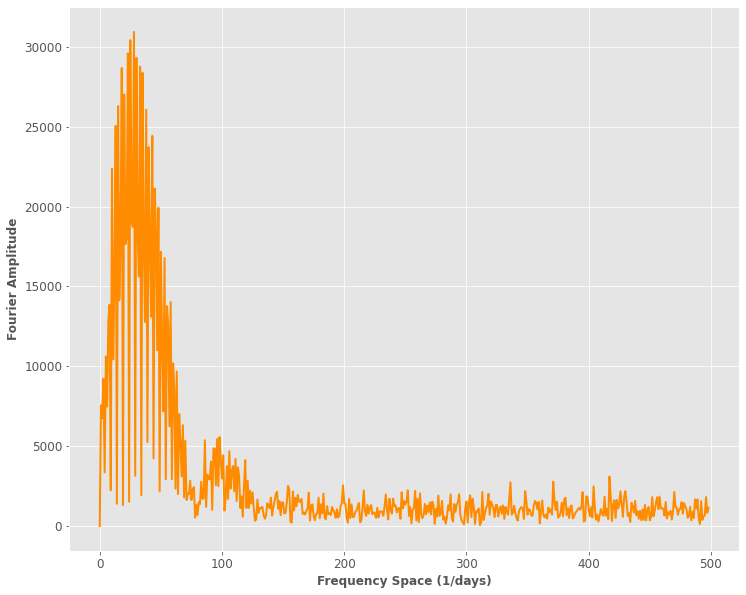

In [223]:
signal = np.array(y)
signal = signal-signal.mean()
fft_signal = np.abs(np.fft.fft(signal))
plt.plot(fft_signal[0:int(len(signal)/2.)],color='darkorange')
plt.xlabel('Frequency Space (1/days)')
plt.ylabel('Fourier Amplitude')

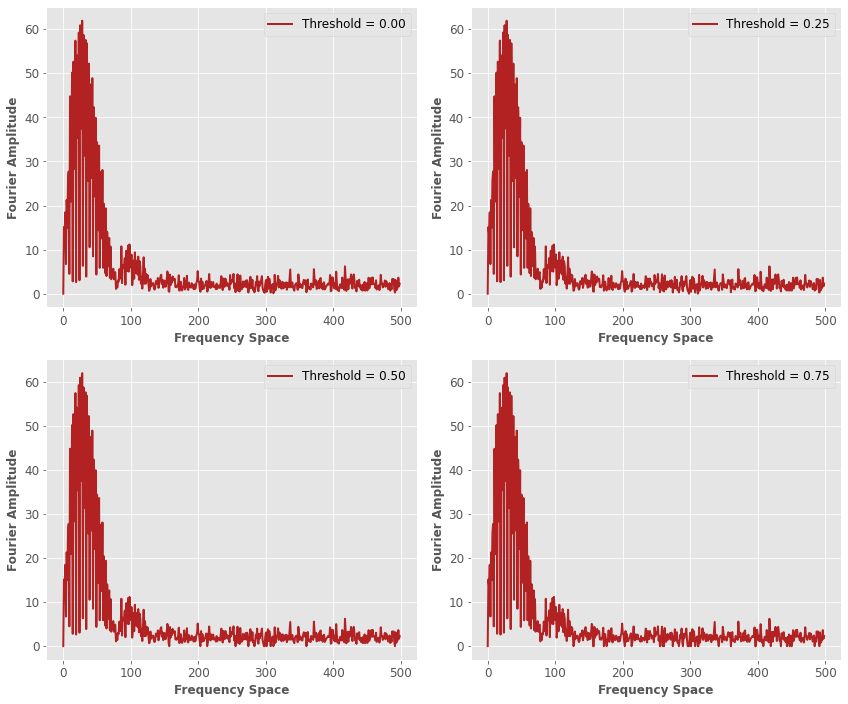

In [276]:
th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter_amp(th_i)
    plt.plot(th_filter[0:int(len(signal)/2.)],color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Frequency Space')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()

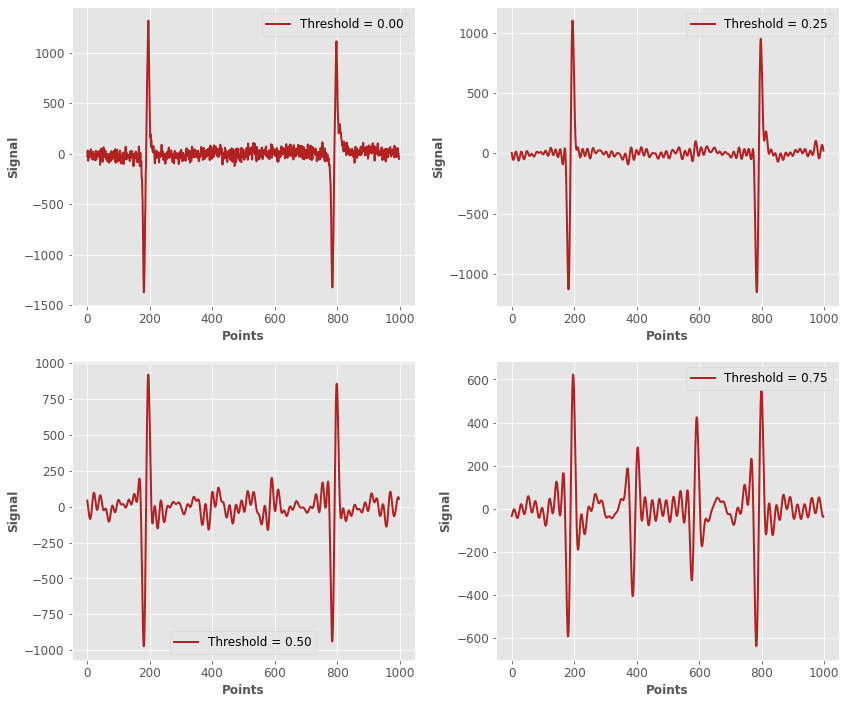

In [277]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter(th_i)
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(signal_filter,color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Points')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()

In [241]:
def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(signal)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(signal)/2.)]/len(signal)).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(signal)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    fft = np.fft.fft(signal)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(X)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]



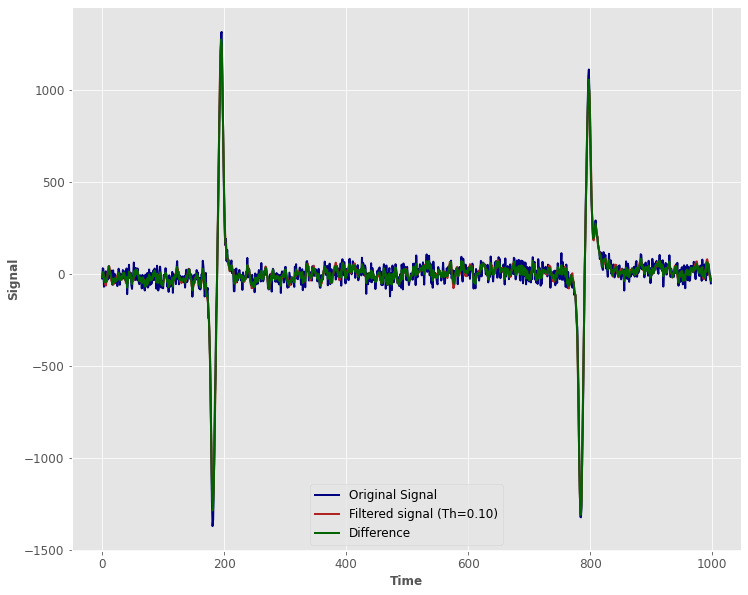

In [268]:
th_example_value = 0.1
example_signal = filter_signal(th_example_value)
plt.plot(signal,color='navy',label='Original Signal')
plt.plot(example_signal,color='firebrick',label='Filtered signal (Th=%.2f)'%(th_example_value))
#plt.plot(signal-example_signal,color='darkorange',label='Difference')
plt.plot(signal - 0.6*(signal-example_signal),color='darkgreen',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()


Text(0.5, 0, 'Threshold Value')

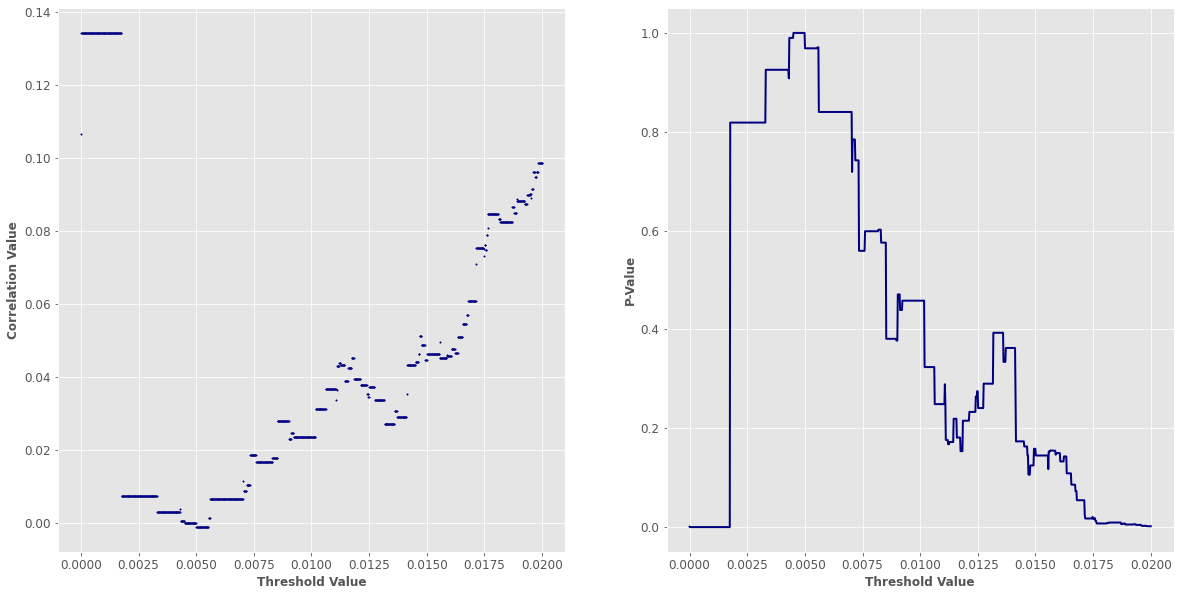

In [278]:
th_list = np.linspace(0,0.02,1000)
th_list = th_list[0:len(th_list)]
p_values = []
corr_values = []
for t in th_list:
    filt_signal = filter_signal(t)
    res = stats.spearmanr(signal,signal-filt_signal)
    p_values.append(res.pvalue)
    corr_values.append(res.correlation)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(th_list,corr_values,s=2,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('Correlation Value')
plt.xlabel('Threshold Value')
plt.subplot(1,2,2)
plt.plot(th_list,p_values,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('P-Value')
plt.xlabel('Threshold Value')

In [1]:
!pip install astropy

In [2]:
import numpy as np
from astropy.modeling.models import Lorentz1D
from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel
lorentz = Lorentz1D(1, 0, 1)
x = np.linspace(-5, 5, 100)
data_1D = lorentz(x) + 0.1 * (np.random.rand(100) - 0.5)

In [50]:
gauss_kernel = Gaussian1DKernel(2)
smoothed_data_gauss = convolve(sinus_proc(a, 0), gauss_kernel)

box_kernel = Box1DKernel(4)
smoothed_data_box = convolve(sinus_proc(a,0), box_kernel)

Text(0.5, 1.0, 'Box vs Original')

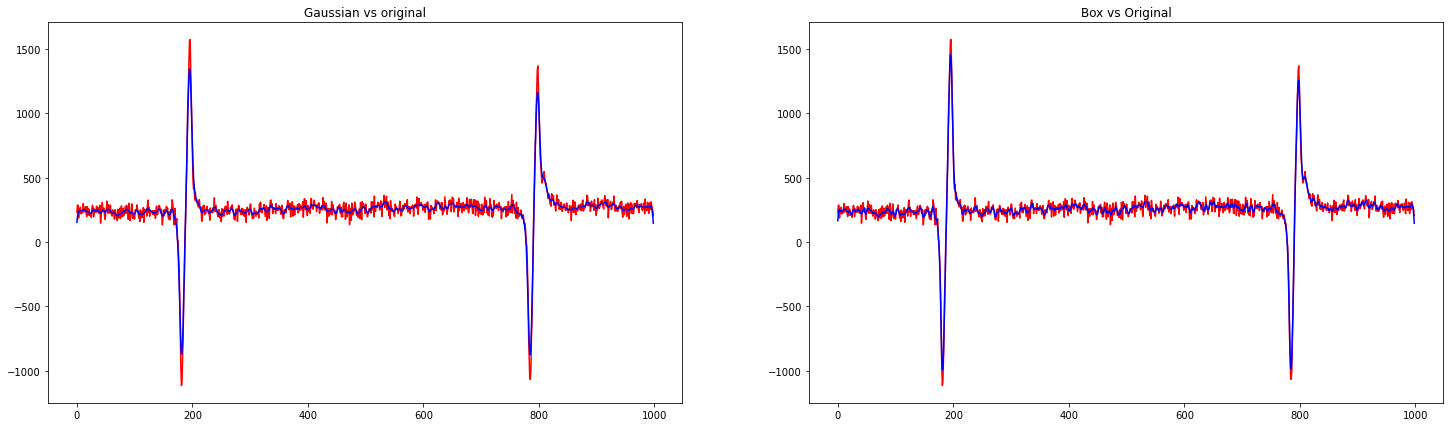

In [51]:
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
plt.plot(range(res.shape[0]), sinus_proc(a, 0), 'r')
plt.plot(range(res.shape[0]), smoothed_data_gauss, 'b')

plt.title('Gaussian vs original')
plt.subplot(1,2,2)
plt.plot(range(0,999), sinus_proc(a, 0 ), 'r')
plt.plot(range(0,999),smoothed_data_box, 'b')
plt.title('Box vs Original')